In [ ]:
# https://zhuanlan.zhihu.com/p/692810462 RF
# https://zhuanlan.zhihu.com/p/692505141 SVM
# https://zhuanlan.zhihu.com/p/112009086 Xboost

In [1]:
setwd('/import/DB/fel/BJTC-204')

In [2]:
load('./exp4.rda')

In [3]:
#exp4[,8:dim(exp4)[2]] = 2^exp4[,8:dim(exp4)[2]] -1

In [4]:
head(exp4)

,death,TYPE,PH,Gender,race,Age,GSM,NAT2,ADA,CDH2,...,HNRPDL,DMTF1,PPP4R1,CDH1,SLC12A6,ROD1,KCNE2,DGCR2,CASP8AP2,SCO2
,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM2431721,0,Control,6.97,M,Caucasian,32,GSM2431721,6.918508,5.958536,7.389671,...,8.062601,8.039051,6.266754,4.402844,6.107446,5.091350,7.473668,7.085446,5.301909,5.986224
GSM2431722,0,Control,7.01,F,Caucasian,63,GSM2431722,6.397328,6.113981,7.629390,...,9.066047,8.447141,6.887356,4.383695,5.726334,4.867468,7.710730,7.402328,5.598268,6.171961
GSM2431723,0,Control,NA,F,Caucasian,70,GSM2431723,6.814676,6.261580,7.571414,...,8.630200,8.170023,6.914393,4.441707,5.981377,4.979711,7.519356,7.314417,5.538427,5.854754
GSM2431726,0,Control,NA,M,Caucasian,71,GSM2431726,7.550068,6.640444,8.030948,...,6.794395,7.583125,6.374021,4.632824,6.542643,5.345686,8.181581,6.815460,5.552289,6.125526
GSM2431727,0,Control,6.87,M,Caucasian,44,GSM2431727,6.336289,6.297053,7.947093,...,9.055285,8.653470,6.902694,4.552302,5.629537,5.043913,7.322026,7.413795,5.617718,5.891519
GSM2431728,0,MDD,7.05,M,Caucasian,66,GSM2431728,6.266404,5.972297,7.826966,...,8.993547,8.454228,6.859039,4.488690,5.823510,4.932490,7.483323,7.521739,5.512290,6.347157


In [5]:
GSM = read.table('./GSM.txt',header =T,sep = '\t')

In [6]:
exp4 = exp4[GSM$GSM,]

In [7]:
dim(exp4)

[1]    84 11882

In [8]:
Type = exp4$TYPE

In [9]:
gene19 = read.table('./gene32.res.txt',col.names = 'gene')

In [10]:
expr = exp4[,gene19$gene]

In [11]:
y = ifelse(Type == 'Control',0,1)

In [12]:
length(y)

[1] 84

In [13]:
y

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[77] 1 1 1 1 1 1 1 1

In [14]:
colnames(expr) = gsub('-','.',colnames(expr))

In [15]:
expr <- expr[, !grepl("^\\d+", names(expr))]

In [16]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [17]:
x = as.matrix(expr)
y = y

In [18]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 4.2.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine




In [19]:
set.seed(111)

In [20]:
rf = randomForest(as.factor(y)~.,data = x,ntree =1000,important=TRUE,proximity=TRUE)

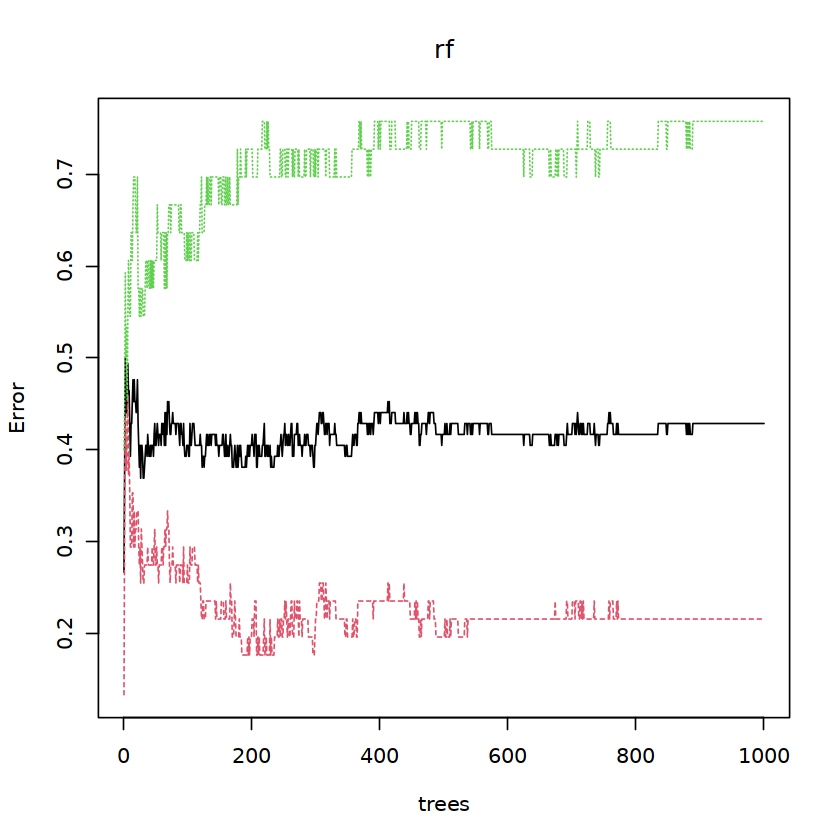

In [21]:
plot(rf)

In [22]:
pdf('forest.pdf',height = 6,width = 6)
plot(rf)
dev.off()

png 
  2

In [23]:
trees = which.min(rf$err.rate[,1])

In [24]:
rf = randomForest(as.factor(y)~.,data = x,ntree =trees,important=TRUE,proximity=TRUE)

In [25]:
importance = importance(rf)

In [26]:
pdf('forest2.pdf',height = 6,width = 4)
varImpPlot(rf,main = '')
dev.off()

png 
  2

In [27]:
# RPE65 + MC3R+NFIL3 + PRF1 + IL6

In [28]:
options(repr.plot.width = 4)

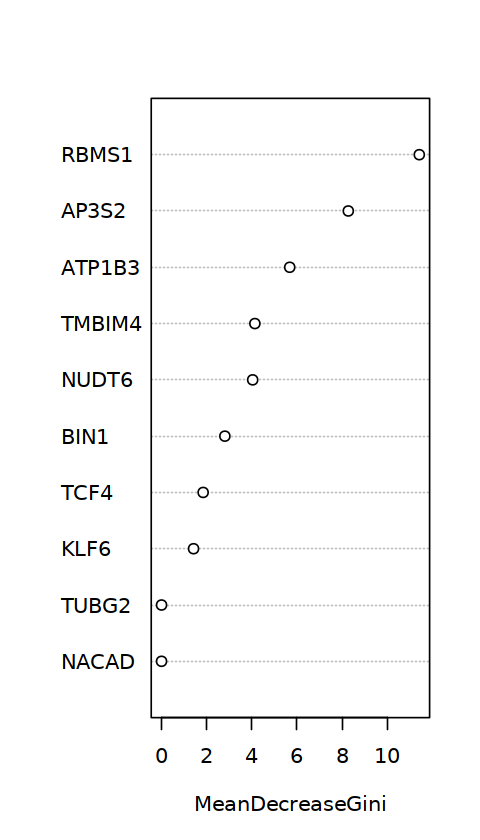

In [29]:
varImpPlot(rf,main = '')

In [30]:
rfGenes=importance[order(importance[, "MeanDecreaseGini"], decreasing  = TRUE),] #重要性评分大于2的基因

In [31]:
rfGenes

RBMS1     AP3S2    ATP1B3    TMBIM4     NUDT6      BIN1      TCF4      KLF6 
11.421281  8.275319  5.680000  4.135686  4.038282  2.805951  1.843810  1.418719 
    TUBG2     NACAD 
 0.000000  0.000000

In [32]:
# rfGenes=names(rfGenes[rfGenes>30]) 
# write.table(rfGenes,file="rfGenes.txt",sep="\t",quote=F,col.names=F,row.names=F) #输出表达量

# expr2 = exp4

# sigExp=expr2[rfGenes,]
# write.table(data.frame(ID=rownames(sigExp),sigExp),file="rfGeneExp.txt",sep="\t",quote=F,col.names=T,row.names=F) 

# rfGenes

### svm

In [33]:
# library(tidyverse)
# library(glmnet)
# library(VennDiagram)
# library(e1071)
# library(caret)
# library(randomForest)

# x = as.matrix(expr)

# y=as.numeric(as.factor(Type))

# library(future)
# plan("multisession",workers=30)

# set.seed(1)
# rfeControl = rfeControl(functions = caretFuncs,
#                         method = "cv", # 默认自助法重采样 boot
#                         saveDetails = T, # 保存预测值和变量重要性
#                         number = 5, # 重抽样次数
#                         allowParallel = T # 允许多线程，用这个之前你要先准备好多线程！
#                         )

# Profile=rfe(x=x,y=as.factor(y),sizes =c(1:32),
#     rfeControl =  rfeControl,
#     methods="svmRadial")

# Profile

# pdf(file="SVM-RFE.pdf", width=6, height=5.5)
# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)
# dev.off()

# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)

# #输出
# featureGenes = Profile$optVariables
# write.table(file="SVM-RFE.gene.txt",featureGenes,sep="\t",quote=F,row.names=F,col.names=F) #表达矩阵 

# featureGenes

### Boruta

In [34]:
library(Boruta)

In [35]:
# x = as.matrix(expr)
y = ifelse(Type == 'Control',0,1)

In [36]:
y

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[77] 1 1 1 1 1 1 1 1

In [37]:
set.seed(111)
boruta <- Boruta(x=x, y=y, pValue=0.05, mcAdj=T, 
       maxRuns=300)

In [38]:
boruta

Boruta performed 18 iterations in 1.417679 secs.
 1 attributes confirmed important: NUDT6;
 9 attributes confirmed unimportant: AP3S2, ATP1B3, BIN1, KLF6, NACAD
and 4 more;

In [39]:
table(boruta$finalDecision)


Tentative Confirmed  Rejected 
        0         1         9 

In [40]:
boruta$finalDecision

TCF4     RBMS1     AP3S2     TUBG2    TMBIM4     NUDT6      KLF6     NACAD 
 Rejected  Rejected  Rejected  Rejected  Rejected Confirmed  Rejected  Rejected 
   ATP1B3      BIN1 
 Rejected  Rejected 
Levels: Tentative Confirmed Rejected

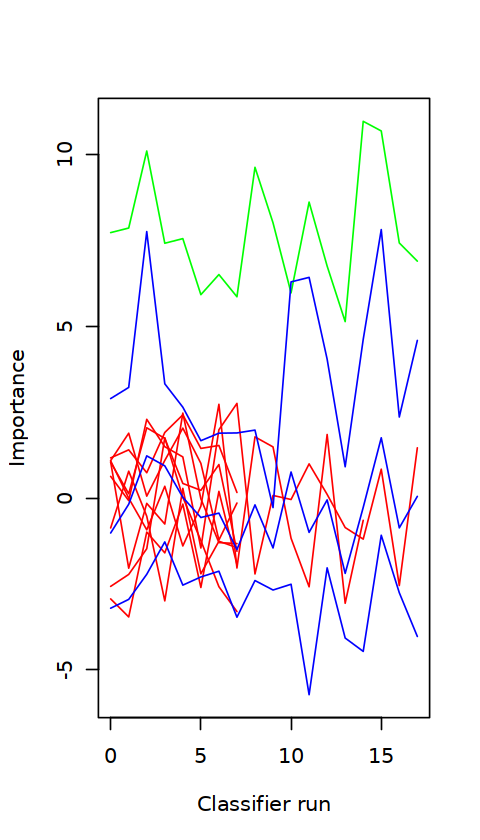

In [41]:
Boruta::plotImpHistory(boruta)

In [42]:
library(dplyr)
boruta.imp <- function(x){
  imp <- reshape2::melt(x$ImpHistory, na.rm=T)[,-1]
  colnames(imp) <- c("Variable","Importance")
  imp <- imp[is.finite(imp$Importance),]

  variableGrp <- data.frame(Variable=names(x$finalDecision), 
                            finalDecision=x$finalDecision)

  showGrp <- data.frame(Variable=c("shadowMax", "shadowMean", "shadowMin"),
                        finalDecision=c("shadowMax", "shadowMean", "shadowMin"))

  variableGrp <- rbind(variableGrp, showGrp)

  boruta.variable.imp <- merge(imp, variableGrp, all.x=T)

  sortedVariable <- boruta.variable.imp %>% group_by(Variable) %>% 
    summarise(median=median(Importance)) %>% arrange(median)
  sortedVariable <- as.vector(sortedVariable$Variable)


  boruta.variable.imp$Variable <- factor(boruta.variable.imp$Variable, levels=sortedVariable)

  invisible(boruta.variable.imp)
}
boruta.variable.imp <- boruta.imp(boruta)


In [43]:
boruta

Boruta performed 18 iterations in 1.417679 secs.
 1 attributes confirmed important: NUDT6;
 9 attributes confirmed unimportant: AP3S2, ATP1B3, BIN1, KLF6, NACAD
and 4 more;

Welcome to YSX package which is a collection of useful scripts.
This package does not require you install all depended packages, since one may not need all functions in this package.
However, when there is a message implying some functions are missing,please install these packages manually.
Or more specially, check Plot.Rmd in vignettes first.




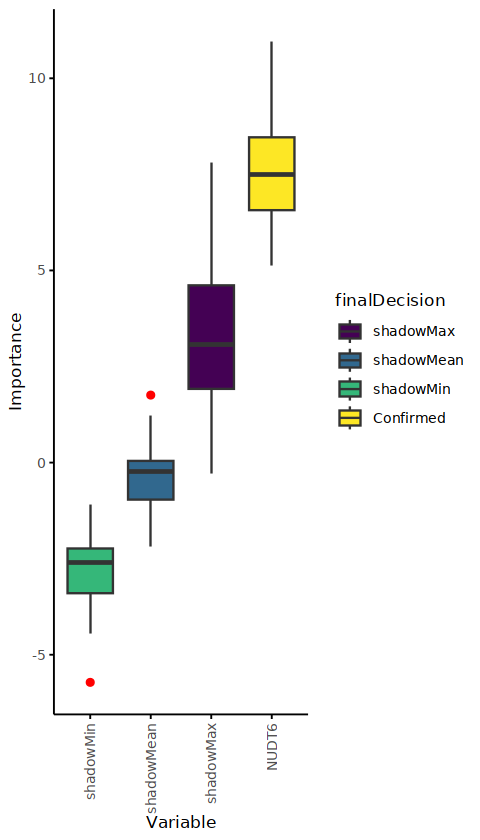

In [44]:
library(YSX)

sp_boxplot(boruta.variable.imp, melted=T, xvariable = "Variable", yvariable = "Importance",
           legend_variable = "finalDecision", legend_variable_order = c("shadowMax", "shadowMean", "shadowMin", "Confirmed"),
           xtics_angle = 90)

In [45]:
expr = cbind(Type,expr)

In [46]:
colnames(expr)[1]  ='Group'

In [47]:
expr3 = expr

In [48]:
set.seed(147)  
index <-  which( (1:nrow(expr3))%%3 == 0 )
train <- expr3[-index,]
test <- expr3[index,]

In [49]:
table(test$Group)


Control     MDD 
     17      11 

In [50]:
library("xgboost")
library("Matrix")
train_matrix <- sparse.model.matrix(Group ~ .-1, data = train)
test_matrix <- sparse.model.matrix(Group ~ .-1, data = test)
all_matrix <- sparse.model.matrix(Group ~ .-1, data = expr3)


Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice


Warning message:
"package 'Matrix' was built under R version 4.2.3"


In [51]:
train_label <- as.numeric(train$Group == 'MDD')
test_label <-  as.numeric(test$Group == 'MDD')
all_label <-  as.numeric(expr3$Group == 'MDD')

In [52]:
all_label

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[77] 1 1 1 1 1 1 1 1

In [53]:
train_fin <- list(data=train_matrix,label=train_label) 
test_fin <- list(data=test_matrix,label=test_label) 
all_fin <- list(data=all_matrix,label=all_label) 

dtrain <- xgb.DMatrix(data = train_fin$data, label = train_fin$label) 
dtest <- xgb.DMatrix(data = test_fin$data, label = test_fin$label)
dall <- xgb.DMatrix(data = all_fin$data, label = all_fin$label)

In [54]:
xgb <- xgboost(data = dall,max_depth=6, eta=0.5,  
  objective='binary:logistic', nround=25)

[1]	train-logloss:0.528598 
[2]	train-logloss:0.405104 
[3]	train-logloss:0.322954 
[4]	train-logloss:0.272705 
[5]	train-logloss:0.233634 
[6]	train-logloss:0.202081 
[7]	train-logloss:0.181859 
[8]	train-logloss:0.163139 
[9]	train-logloss:0.149901 
[10]	train-logloss:0.137729 
[11]	train-logloss:0.128568 
[12]	train-logloss:0.121747 
[13]	train-logloss:0.113902 
[14]	train-logloss:0.108099 
[15]	train-logloss:0.101964 
[16]	train-logloss:0.096510 
[17]	train-logloss:0.092655 
[18]	train-logloss:0.089761 
[19]	train-logloss:0.086553 
[20]	train-logloss:0.083480 
[21]	train-logloss:0.080367 
[22]	train-logloss:0.077210 
[23]	train-logloss:0.074797 
[24]	train-logloss:0.072797 
[25]	train-logloss:0.071361 


In [55]:
xgb

##### xgb.Booster
raw: 29.6 Kb 
call:
  xgb.train(params = params, data = dtrain, nrounds = nrounds, 
    watchlist = watchlist, verbose = verbose, print_every_n = print_every_n, 
    early_stopping_rounds = early_stopping_rounds, maximize = maximize, 
    save_period = save_period, save_name = save_name, xgb_model = xgb_model, 
    callbacks = callbacks, max_depth = 6, eta = 0.5, objective = "binary:logistic")
params (as set within xgb.train):
  max_depth = "6", eta = "0.5", objective = "binary:logistic", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
  cb.evaluation.log()
# of features: 10 
niter: 25
nfeatures : 10 
evaluation_log:
    iter train_logloss
       1    0.52859825
       2    0.40510377
---                   
      24    0.07279673
      25    0.07136092

Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
NUDT6,0.24488229,0.18731753,0.12213740
ATP1B3,0.18046699,0.08244929,0.11450382
RBMS1,0.10561999,0.10757253,0.12213740
TMBIM4,0.09321783,0.10154792,0.10687023
TUBG2,0.08351239,0.09363352,0.10687023
TCF4,0.07709035,0.09105742,0.07633588


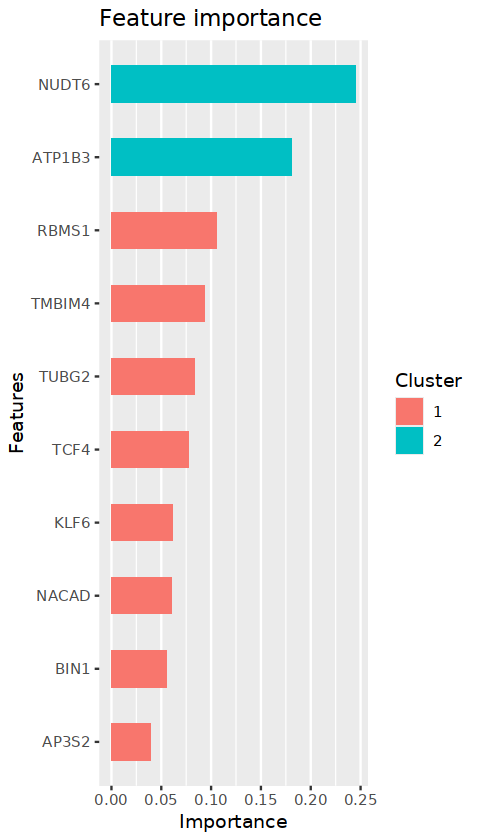

In [56]:
importance <- xgb.importance(all_matrix@Dimnames[[2]], model = xgb)  
head(importance)
xgb.ggplot.importance(importance)

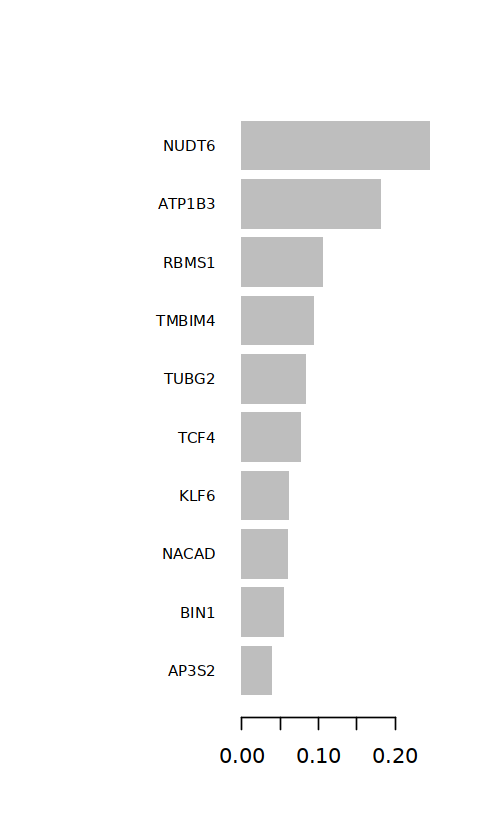

In [57]:
xgb.plot.importance(importance)

In [58]:
# lasso

In [59]:
library(lars) 
library(glmnet) 

Warning message:
"package 'lars' was built under R version 4.2.3"
Loaded lars 1.3


Warning message:
"package 'glmnet' was built under R version 4.2.3"
Loaded glmnet 4.1-8



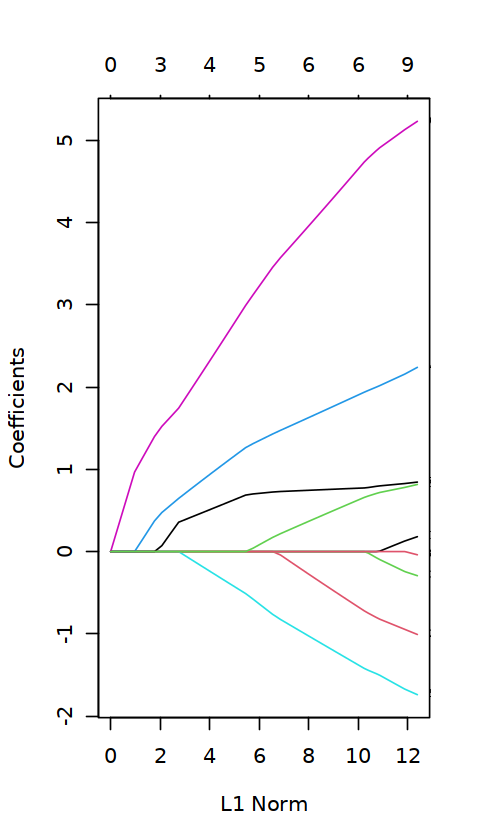

In [60]:
#用基因的表达情况预测生死
model_lasso <- glmnet(x, y, family="binomial", nlambda=100, alpha=1)#拉手回归模型
plot(model_lasso, xvar = "norm", label = TRUE)

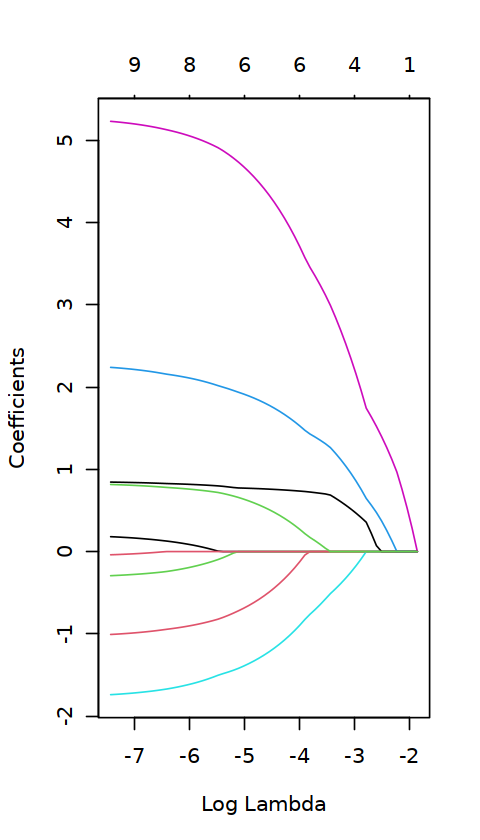

In [61]:
plot(model_lasso, xvar="lambda", label=TRUE)

In [62]:
cv_fit <- cv.glmnet(x=x, y=y, alpha = 1, nlambda = 100)

[1] 0.02937002 0.09843665

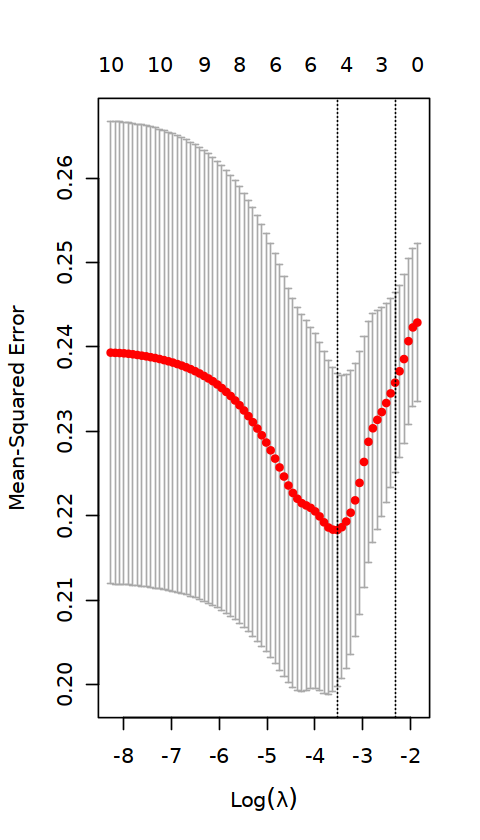

In [63]:
plot(cv_fit)
# 两条虚线分别指示了两个特殊的λ值:
c(cv_fit$lambda.min,cv_fit$lambda.1se) 

In [64]:
model_lasso <- glmnet(x=as.matrix(x), y=y, alpha = 1, lambda=cv_fit$lambda.min	)
gene_1se <- rownames(model_lasso$beta)[as.numeric(model_lasso$beta)!=0]
gene_1se = gsub('[.]',' ',gene_1se)

In [65]:
gene_1se

[1] "TUBG2"  "TMBIM4" "NUDT6"  "KLF6"   "ATP1B3"

### 韦恩图

In [66]:
importance$Feature

[1] "NUDT6"  "ATP1B3" "RBMS1"  "TMBIM4" "TUBG2"  "TCF4"   "KLF6"   "NACAD" 
 [9] "BIN1"   "AP3S2"

In [67]:
RF.gene = names(rfGenes)[1:10]
#SVF.RFE.gene = featureGenes
XGBoost.gene = importance$Feature[1:10]

In [68]:
boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed','Tentative')) %>% dplyr::select(Variable) %>% unique()

In [69]:
Boruta.gene = as.vector(boruta.variable.imp2$Variable)

In [70]:
lasso.gene  = gene_1se

In [71]:
list1 = list(RF.gene,lasso.gene,Boruta.gene,XGBoost.gene)

In [72]:
data =  as.data.frame (do.call (cbind, list1))

In [73]:

library(venn)
        library(VennDiagram)
        color=c( "#3C5488B2","#00A087B2", 
             "#F39B7FB2","#91D1C2B2", 
             "#8491B4B2", "#DC0000B2", 
             "#7E6148B2","yellow", 
             "darkolivegreen1", "lightskyblue", 
             "darkgreen", "deeppink", "khaki2", 
             "firebrick", "brown1", "darkorange1", 
             "cyan1", "royalblue4", "darksalmon", 
             "darkgoldenrod1", "darkseagreen", "darkorchid")

    if (ncol(data) == 2){
        sample_list <- list(c1 = data[,1], c2 = data[,2])
    }else if(ncol(data) == 3){
        sample_list <- list(RF.gene = data[,1], Boruta.gene = data[,2], XGBoost.gene = data[,3])
    }else if(ncol(data) == 4){
        sample_list <- list(RF.gene = data[,1], SVF.RFE.gene = data[,2], Boruta.gene = data[,3], XGBoost.gene = data[,4])
    }else{
        sample_list <- list(c1 = data[,1], c2 = data[,2], c3 = data[,3], c4 = data[,4], c5 = data[,5])
    }
    
    q <- venn.diagram(sample_list,filename = NULL,
             fill = color[1:(length(sample_list))],
             alpha = 0.50, cat.col = rep('black', ncol(data)), 
             col = 'black', cex = 1, fontfamily = 'serif', cat.cex = 1, cat.fontfamily = 'serif', margin = 0.2
                             )
    pdf(paste0('./',"venn.pdf"))
    grid.draw(q)
    dev.off()

Warning message:
"package 'venn' was built under R version 4.2.3"
Loading required package: grid

Loading required package: futile.logger

Warning message:
"package 'futile.logger' was built under R version 4.2.3"


png 
  2

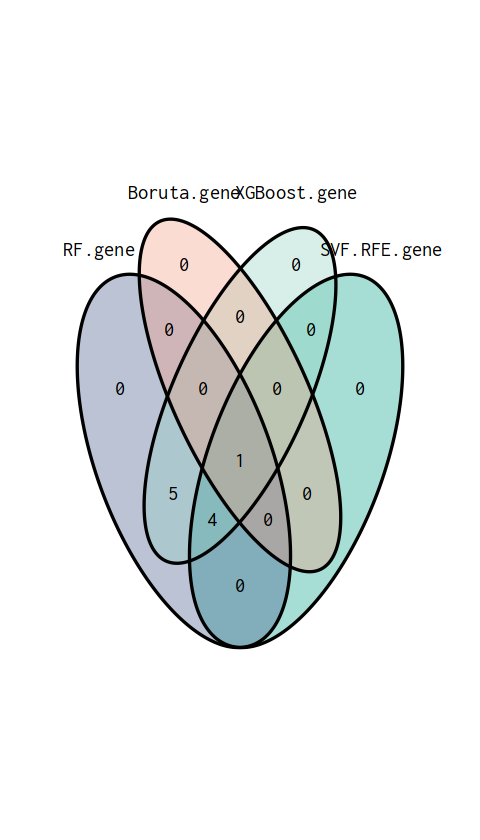

In [74]:
grid.draw(q)

In [75]:
intersect(intersect(intersect(RF.gene,XGBoost.gene),Boruta.gene),lasso.gene)

[1] "NUDT6"

In [76]:
model.gene = intersect(lasso.gene,XGBoost.gene)

In [91]:
model.gene  =lasso.gene

In [92]:
model.gene

[1] "TUBG2"  "TMBIM4" "NUDT6"  "KLF6"   "ATP1B3"

In [93]:
set.seed(1234)

In [94]:
expr3 = expr

In [95]:
expr3[expr3$Group =='MDD',]$Group<-1

In [96]:

expr3[expr3$Group =='Control',]$Group<-0
expr3$Group = as.numeric(expr3$Group)

In [97]:
table(Type)

Type
Control     MDD 
     51      33 

In [98]:
expr4 = expr3 %>% dplyr::select(c(Group,model.gene))

In [99]:
dim(expr4)

[1] 84  6

In [100]:
head(expr4,7)

,Group,TUBG2,TMBIM4,NUDT6,KLF6,ATP1B3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM2431804,0,7.369963,5.357227,4.709413,6.457809,8.205091
GSM2432040,0,7.784695,5.834264,4.781688,6.368521,9.172421
GSM2432045,0,7.917621,6.376782,4.974414,6.689969,9.222806
GSM2431943,0,7.547290,6.535882,4.880029,6.455200,8.952916
GSM2431991,0,7.579105,6.399636,4.853250,6.511610,8.724717
GSM2432005,0,7.610809,6.019636,5.033894,6.907748,9.734900
GSM2432041,0,7.914728,6.435455,5.054371,6.444839,9.278713


In [101]:
# library(caret)
# library(ggplot2)

#  a = c()
# # 
# for (i in model.gene){
#     res<-pROC::roc(Group~expr4[,i],data=expr4,aur=TRUE,
#          ci=TRUE, # 显示95%CI
#          #percent=TRUE, # 是否需要以百分比显示
#          smooth=FALSE,# 是否平滑曲线
#          levels=c(0,1),direction="<" #设置分组方向
#          )
#     if (res$auc > 0.5){
#         a = append(a,i)
#         print(paste0(i,' ',res$auc))
#         p = pROC::ggroc(res, color ="red",legacy.axes = TRUE)+
#   geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color="darkgrey", linetype=4)+
#   theme_bw() + # 设置背景
#   ggtitle(paste0(i," ROC Curve"))+
#   theme(plot.title = element_text(hjust = 0.5,size = 16),
#         axis.text=element_text(size=12,colour = "black"),
#         axis.title.x = element_text(size = 14),
#         axis.title.y = element_text(size = 14))
# p+annotate("text",x=0.75,y=0.25,label=paste("AUC = ", round(res$auc,3)))+
#   annotate("text",x=0.75,y=0.20,label=paste("95%CI: ", round(res$ci[1],3),'-',round(res$ci[3],3)))
#     ggsave(file = paste0(i,'.ROC.pdf'))
# }else{
        
# }

    
#     }

### 批量单因素逻辑回归

In [102]:
#expr4 = expr3

In [103]:
#结果合并需要的包
library(plyr)
#可进行logistic回归的包
library(rms)#可实现逻辑回归模型（lrm）
library(epiDisplay)#快速输出OR、95%CI、P
#library(gtsummary)#精美三线表（但，95%CI有误）

varsU<-names(expr4[,2:dim(expr4)[2]])

Result<-c()
for (i in 1:length(varsU)){
  fit<-glm(substitute(Group~x,list(x=as.name(varsU[i]))),data=expr4,family=binomial())
  fitSum<-summary(fit)
  result1<-c()
  result1<-rbind(result1,fitSum$coef)
  OR<-exp(fitSum$coef[,'Estimate'])
  result1<-data.frame(cbind(result1,cbind(OR,exp(confint(fit)))))
  result1$Characteristics<-varsU[i]   #添加变量名
  Result<-rbind(Result,result1[-1,])#[-1,],删除常数项
}

Result

Uni_log<-data.frame(Result[,c(1,4:8)]) #提取"P","OR","CIlower","CIupper"和变量名

colnames(Uni_log)[2:5]<-c("P","OR","CIlower","CIupper")#变量重命名

ExtractVar<-unique(Uni_log$Characteristics[Uni_log$"P"<0.05]) 

tzgene = Uni_log %>% dplyr::filter(P < 0.05) %>% rownames()

Uni_log[tzgene,]

### 多因素分析

tzgene

data = expr4[,c('Group',tzgene)]

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...



,Estimate,Std..Error,z.value,Pr...z..,OR,X2.5..,X97.5..,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
TUBG2,2.12374750,0.9861543,2.1535651,0.03127429,8.3624170,1.3083751,65.046777,TUBG2
TMBIM4,-0.08769551,0.3915265,-0.2239836,0.82277008,0.9160398,0.4210280,1.978848,TMBIM4
NUDT6,3.28953385,1.1792199,2.7895846,0.00527757,26.8303536,2.9448994,314.307411,NUDT6
KLF6,1.89614222,1.2889145,1.4711156,0.14125985,6.6601514,0.5604426,94.834846,KLF6
ATP1B3,0.93909973,0.5866813,1.6006982,0.10944377,2.5576778,0.8315872,8.484340,ATP1B3


,Estimate,P,OR,CIlower,CIupper,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
TUBG2,2.123748,0.03127429,8.362417,1.308375,65.04678,TUBG2
NUDT6,3.289534,0.00527757,26.830354,2.944899,314.30741,NUDT6


[1] "TUBG2" "NUDT6"

In [104]:


# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

fit.reduce<-glm(Group~.,data=data,family=binomial())
summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8655  -0.8865  -0.6832   0.9891   1.8815  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -27.688      9.082  -3.049   0.0023 **
TUBG2          1.676      1.009   1.661   0.0966 . 
NUDT6          2.926      1.196   2.447   0.0144 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 112.56  on 83  degrees of freedom
Residual deviance: 100.92  on 81  degrees of freedom
AIC: 106.92

Number of Fisher Scoring iterations: 4


Waiting for profiling to be done...



,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),-27.688,9.293,0(0~0),0.002
TUBG2,1.676,2.760,5.344(0.772~42.555),0.097
NUDT6,2.926,5.987,18.653(1.957~223.779),0.014


In [105]:
fit.reduce<-glm(Group~. ,data=data,family=binomial())
summary(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8655  -0.8865  -0.6832   0.9891   1.8815  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -27.688      9.082  -3.049   0.0023 **
TUBG2          1.676      1.009   1.661   0.0966 . 
NUDT6          2.926      1.196   2.447   0.0144 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 112.56  on 83  degrees of freedom
Residual deviance: 100.92  on 81  degrees of freedom
AIC: 106.92

Number of Fisher Scoring iterations: 4


In [106]:
logit.step <- step(fit.reduce,direction='both')
summary(logit.step)

Start:  AIC=106.92
Group ~ TUBG2 + NUDT6

        Df Deviance    AIC
<none>       100.92 106.92
- TUBG2  1   103.80 107.80
- NUDT6  1   107.48 111.48



Call:
glm(formula = Group ~ TUBG2 + NUDT6, family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8655  -0.8865  -0.6832   0.9891   1.8815  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -27.688      9.082  -3.049   0.0023 **
TUBG2          1.676      1.009   1.661   0.0966 . 
NUDT6          2.926      1.196   2.447   0.0144 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 112.56  on 83  degrees of freedom
Residual deviance: 100.92  on 81  degrees of freedom
AIC: 106.92

Number of Fisher Scoring iterations: 4


In [107]:
# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

# fit.reduce<-glm(Group~.,data=data,family=binomial())
# summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(logit.step)

Waiting for profiling to be done...



,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),-27.688,9.293,0(0~0),0.002
TUBG2,1.676,2.760,5.344(0.772~42.555),0.097
NUDT6,2.926,5.987,18.653(1.957~223.779),0.014


In [108]:
b = rownames(formatFit(logit.step))[2:length(rownames(formatFit(logit.step)))]

Waiting for profiling to be done...

Waiting for profiling to be done...



In [109]:
save(b,file = 'b.rda')

In [110]:
data = data[,c('Group',b)]

In [111]:
library(autoReg)


Attaching package: 'autoReg'


The following object is masked from 'package:MASS':

    select




In [112]:
overall.log =  glm(Group~.,data=data,family=binomial())

model3<-autoReg(overall.log,uni=TRUE,milti=TRUE,threshold=0.05)

model3

name,desc,0 (N=51),1 (N=33),id,OR (univariable),OR (multivariable)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TUBG2,Mean <U+00B1> SD,7.6 <U+00B1> 0.2,7.8 <U+00B1> 0.2,TUBG2,"8.36 (1.21-57.78, p=.031)","5.34 (0.74-38.60, p=.097)"
NUDT6,Mean <U+00B1> SD,4.8 <U+00B1> 0.2,5.0 <U+00B1> 0.2,NUDT6,"26.83 (2.66-270.63, p=.005)","18.65 (1.79-194.38, p=.014)"


In [113]:
library(caret)

Warning message:
"package 'caret' was built under R version 4.2.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.3"

Attaching package: 'ggplot2'


The following object is masked from 'package:epiDisplay':

    alpha


The following object is masked from 'package:randomForest':

    margin


Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 4.2.3"

Attaching package: 'lattice'


The following object is masked from 'package:epiDisplay':

    dotplot


Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"

Attaching package: 'caret'


The following object is masked from 'package:survival':

    cluster




In [114]:
set.seed(141)
#单纯10折交叉验证，time=1
folds <-createMultiFolds(y=data$Group,k=5,times=5)
#10次批量训练与验证
#做成循环
auc_value<-as.numeric()
for(i in 1:10){
  train<- data[ folds[[i]],] 
  test <- data[-folds[[i]],] 
  model<-glm(Group~.,data=train,family=binomial())  #TNFSF14+CCNA2+MARCKS+SGOL1+SAP130
    
  model_pre<-predict(model,type='response', newdata=train)
    
  auc_value<- append(auc_value,
                     as.numeric(pROC::auc(as.numeric(train[,1]),model_pre)))
}
mean(auc_value)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] 0.7041918

In [115]:
auc_value

[1] 0.6601852 0.6613508 0.6972222 0.7751938 0.7321429 0.7076190 0.6772983
 [8] 0.6910714 0.7240741 0.7157598

In [116]:
num <- which.max(auc_value)
print(num)

fold_test <- data[folds[[num]],]   
fold_train <- data[-folds[[num]],]

fold_pre <- glm(Group~.,data=fold_train,family=binomial())

fold_predict <- predict(fold_pre,type='response',newdata=fold_test)

options(repr.plot.width = 6)

[1] 4


Setting levels: control = 0, case = 1

Setting direction: controls > cases



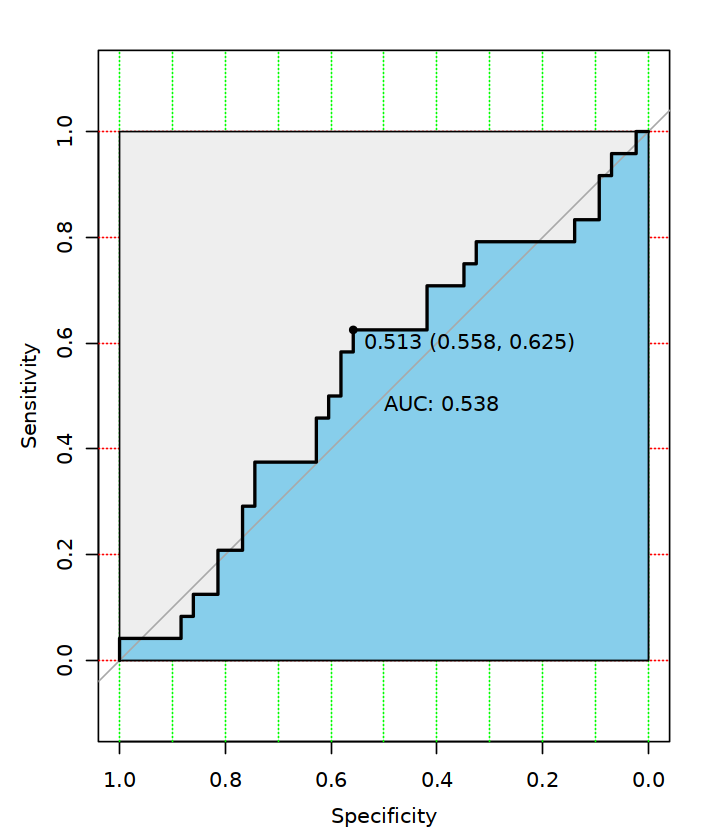

In [117]:
roc_curve <- pROC::roc(as.numeric(fold_test$Group),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="")

In [118]:
g <- pROC::ggroc(m,legacy.axes = T,size = 1,color = "#2fa1dd")
pROC::auc(m)  # Area under the curve: 0.9953

g + theme_minimal() +
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), 
               colour = "grey", linetype = "dashed")+
  annotate("text",x = .75, y = .25,
           label = paste("AUC of min = ",format(round(as.numeric(pROC::auc(m)),2),nsmall = 2)),color = "#2fa1dd")

ERROR: Error in pROC::ggroc(m, legacy.axes = T, size = 1, color = "#2fa1dd"): object 'm' not found


In [ ]:
library(ROCR)

In [ ]:
dd<-datadist(data)  #开始打包数据
options(datadist="dd")

In [ ]:
data$Group = as.factor(data$Group)

In [104]:
fit1 <- lrm(Group~RPE65 + DRD3+ MC3R+RELB  + PRF1, data=data,x=T,y=T)


In [105]:
fit1

Logistic Regression Model

lrm(formula = Group ~ RPE65 + DRD3 + MC3R + RELB + PRF1, data = data, 
    x = T, y = T)

                       Model Likelihood     Discrimination    Rank Discrim.    
                             Ratio Test            Indexes          Indexes    
Obs            59    LR chi2      30.80     R2       0.542    C       0.875    
 0             29    d.f.             5     R2(5,59) 0.354    Dxy     0.749    
 1             30    Pr(> chi2) <0.0001    R2(5,44.2)0.442    gamma   0.749    
max |deriv| 3e-09                           Brier    0.146    tau-a   0.381    

          Coef    S.E.   Wald Z Pr(>|Z|)
Intercept  9.1037 4.5460  2.00  0.0452  
RPE65     -1.4752 0.5688 -2.59  0.0095  
DRD3      -1.0804 0.5528 -1.95  0.0507  
MC3R      -1.2752 0.5846 -2.18  0.0291  
RELB      -0.1619 0.7859 -0.21  0.8367  
PRF1      -0.7167 0.4253 -1.69  0.0920  


In [106]:
#  https://blog.csdn.net/Ayue0616/article/details/126601832

In [107]:
# cal1 <- calibrate(fit1, method='boot', B=1000) 
# plot(cal1,xlim=c(0,1.0),ylim=c(0,1.0))

### https://blog.51cto.com/u_15172991/5428282  模型图的解释参考链接

In [117]:
# https://ayueme.github.io/R_clinical_model/nomogram-essential.html

In [ ]:
# https://blog.csdn.net/Dr_long1996/article/details/135446784

In [118]:
fit1

Logistic Regression Model

lrm(formula = Group ~ RPE65 + DRD3 + MC3R + RELB + PRF1, data = data, 
    x = T, y = T)

                       Model Likelihood     Discrimination    Rank Discrim.    
                             Ratio Test            Indexes          Indexes    
Obs            59    LR chi2      30.80     R2       0.542    C       0.875    
 0             29    d.f.             5     R2(5,59) 0.354    Dxy     0.749    
 1             30    Pr(> chi2) <0.0001    R2(5,44.2)0.442    gamma   0.749    
max |deriv| 3e-09                           Brier    0.146    tau-a   0.381    

          Coef    S.E.   Wald Z Pr(>|Z|)
Intercept  9.1037 4.5460  2.00  0.0452  
RPE65     -1.4752 0.5688 -2.59  0.0095  
DRD3      -1.0804 0.5528 -1.95  0.0507  
MC3R      -1.2752 0.5846 -2.18  0.0291  
RELB      -0.1619 0.7859 -0.21  0.8367  
PRF1      -0.7167 0.4253 -1.69  0.0920  


In [109]:
save(fit1,data,file = 'bulk2.fit1.rda')

In [110]:
#列线图代码只能在Rstudio话

In [111]:
# library('regplot')
# regplot(fit1,
#         plots = c("violin", "boxes"), ##连续性变量形状，可选"no plot" "density" "boxes" "ecdf" "bars" "boxplot" "violin" "bean" "spikes"；分类变量的形状，可选"no plot" "boxes" "bars" "spikes"
#         observation = data[1,], #用哪行观测，或者T F
#         center = T, # 对齐变量
#         subticks = T,
#         droplines = T,#是否画竖线
#         title = "nomogram",
#         points = T, # 截距项显示为0-100
#         odds = T, # 是否显示OR值
#         showP = T, # 是否显示变量的显著性标记
#         rank = "sd", # 根据sd给变量排序
#         interval="confidence", # 展示可信区间
#         clickable = F # 是否可以交互
# )

In [112]:
fit.result<-summary(fit.reduce)
df1<-fit.result$coefficients
df2<-confint(fit.reduce)
df3<-cbind(df1,df2)
df4<-data.frame(df3[-1,c(1,4,5,6)])
df4$Var<-rownames(df4)
colnames(df4)<-c("OR","Pvalue","OR_1","OR_2","Var")
df5<-df4[,c(5,1,2,3,4)]
df5$OR_mean<-df5$OR
df5$OR<-paste0(round(df5$OR,2),
               "(",
               round(df5$OR_1,2),
               "~",
               round(df5$OR_2,2),
               ")")
df5$Pvalue<-round(df5$Pvalue,3)
write.csv(df5,file = "forestplot_example.csv",
          quote = F,row.names = F)

Waiting for profiling to be done...



In [116]:
library(forestplot)
fp<-read.csv("forestplot_example.csv",header=T)

# forestplot(labeltext=as.matrix(fp[,1:3]),
#            mean=fp$OR_mean,
#            lower=fp$OR_1,
#            upper=fp$OR_2,
#            zero=0,
#            boxsize=0.2,
#            graph.pos=2)

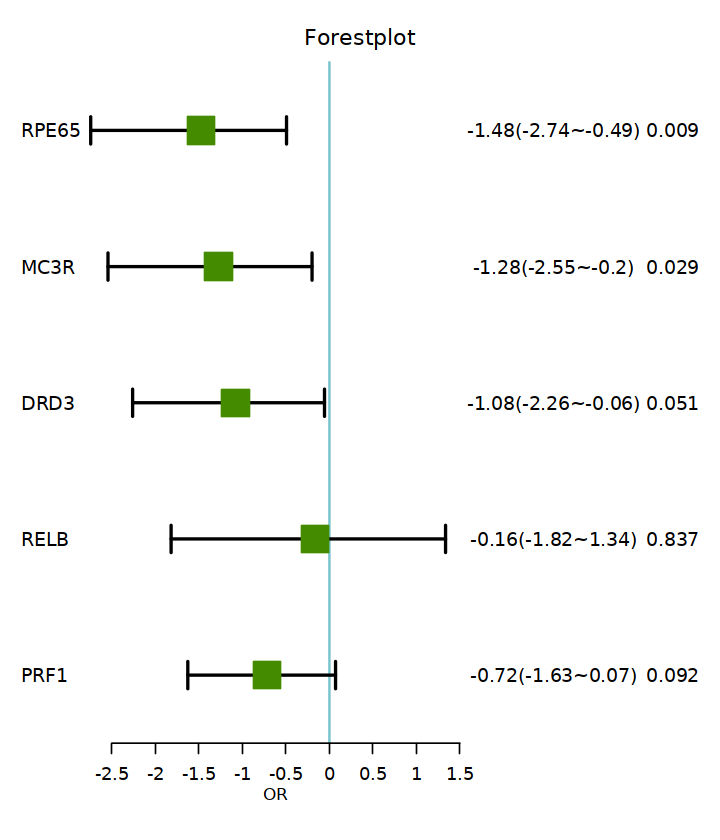

In [115]:
forestplot(labeltext=as.matrix(fp[,1:3]),
           mean=fp$OR_mean,
           lower=fp$OR_1,
           upper=fp$OR_2,
           zero=0,
           boxsize=0.2,
           lineheight = unit(7,'mm'),
           colgap=unit(2,'mm'),
           lwd.zero=1.5,
           lwd.ci=2, 
           col=fpColors(box='#458B00',
                        summary='#8B008B',
                        lines = 'black',
                        zero = '#7AC5CD'),
           xlab="OR",
           lwd.xaxis =1,
           txt_gp = fpTxtGp(ticks = gpar(cex = 0.85),
                            xlab  = gpar(cex = 0.8),
                            cex = 0.9),
           lty.ci = "solid",
           title = "Forestplot", 
           line.margin = 0.08,
           graph.pos=2)


In [209]:
nmfinput= data[MDD,c('RPE65' ,'DRD3','MC3R','RELB' , 'PRF1')] %>%  t() %>%  as.data.frame()

In [210]:
library(NMF)

In [211]:
ranks <- 1:10
estim.coad <- nmf(nmfinput,ranks, nrun=10)
duplicated(colnames(nmfinput))

Warning message in cor(d.consensus, d.coph, method = "pearson"):
"the standard deviation is zero"


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE

Warning message:
"Removed 3 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 11 rows containing missing values (`geom_point()`)."


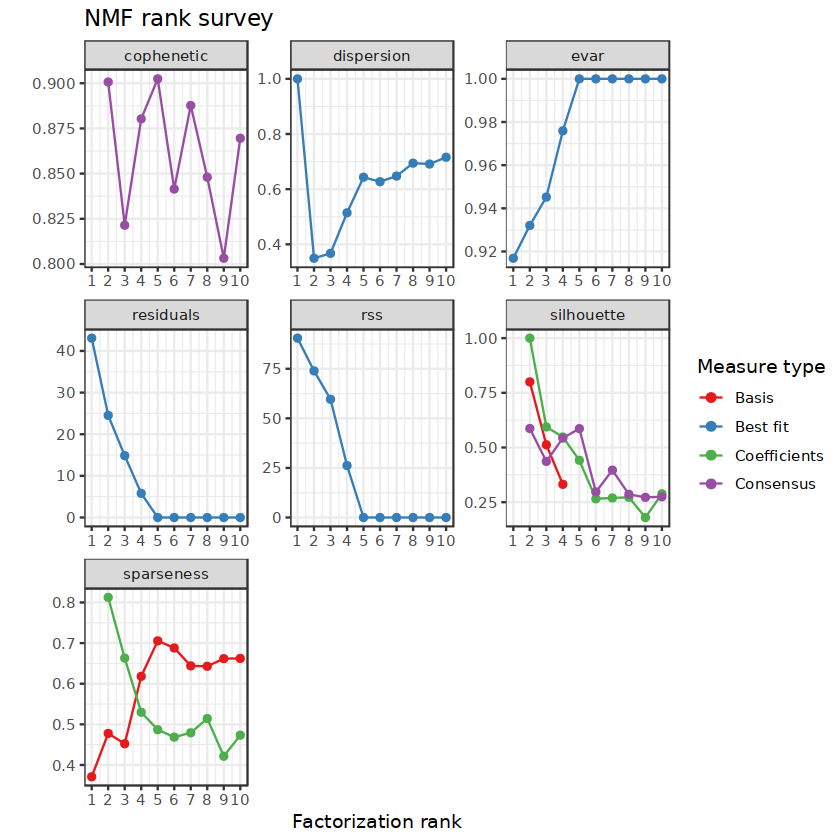

In [212]:
plot(estim.coad)

In [213]:
seed = 2020820
nmf.rank4 <- nmf(nmfinput, 
                 rank = 2, 
                 nrun=50,
                 seed = seed, 
                 method = "brunet")

group
 1  2 
21  9 

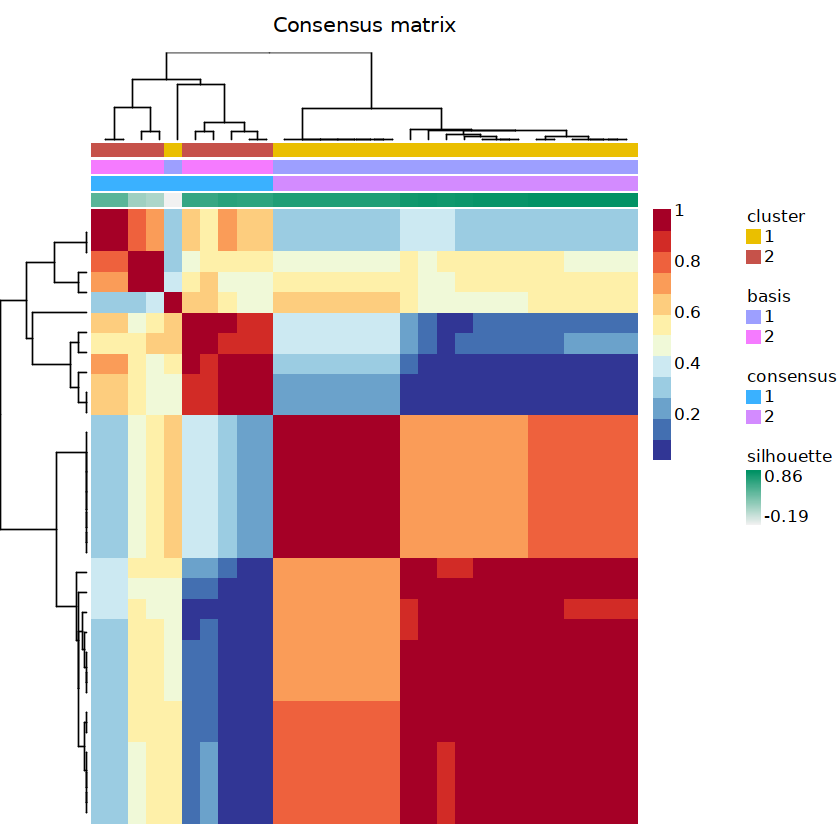

In [214]:
jco <- c("#EABF00","#C6524A","#868686")
index <- extractFeatures(nmf.rank4,"max") 
sig.order <- unlist(index)
NMF.Exp.rank4 <- nmfinput[sig.order,]
NMF.Exp.rank4 <- na.omit(NMF.Exp.rank4) #sig.order有时候会有缺失值
group <- predict(nmf.rank4) # 提出亚型
table(group)
consensusmap(nmf.rank4,
             labRow = NA,
             labCol = NA,
             annCol = data.frame("cluster"=group[colnames(NMF.Exp.rank4)]),
             annColors = list(cluster=c("1"=jco[1],"2"=jco[2])))

In [215]:
library(tinyarray)

In [225]:
data1 = data[MDD,-1] %>%  t() %>% as.data.frame()

In [226]:
a = data1[,colnames(nmfinput)]

In [227]:
cg=names(tail(sort(apply(a,1,sd)),12000))
n=a[cg,]

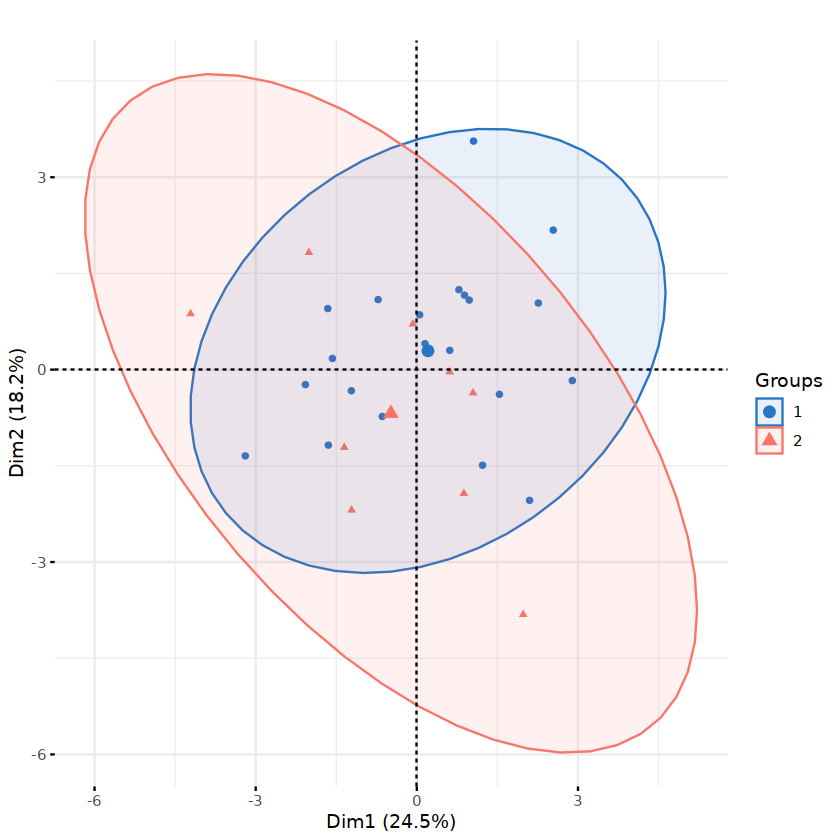

In [228]:
draw_pca(n,group)

In [231]:
library(Rtsne)
tsne_out = Rtsne(t(n),perplexity = 1)
pdat = data.frame(tsne_out$Y,factor(group))
colnames(pdat) = c("Y1","Y2","group")
head(pdat)

,Y1,Y2,group
,<dbl>,<dbl>,<fct>
V10,49.59959,172.010281,2
V15,207.23713,-79.947753,2
V16,201.56723,-89.036425,1
V18,-43.43508,3.824127,2
V19,-185.23555,98.308446,1
V20,-37.09595,-82.671437,1


In [294]:
pdat1 = pdat %>% tibble::rownames_to_column(.,'sample')

In [295]:
bulk2.group = pdat1[,c(1,4)]
write.csv(bulk2.group,file = 'bulk2.group.csv',row.names =F)

In [296]:
dim(bulk2.group)

[1] 30  2

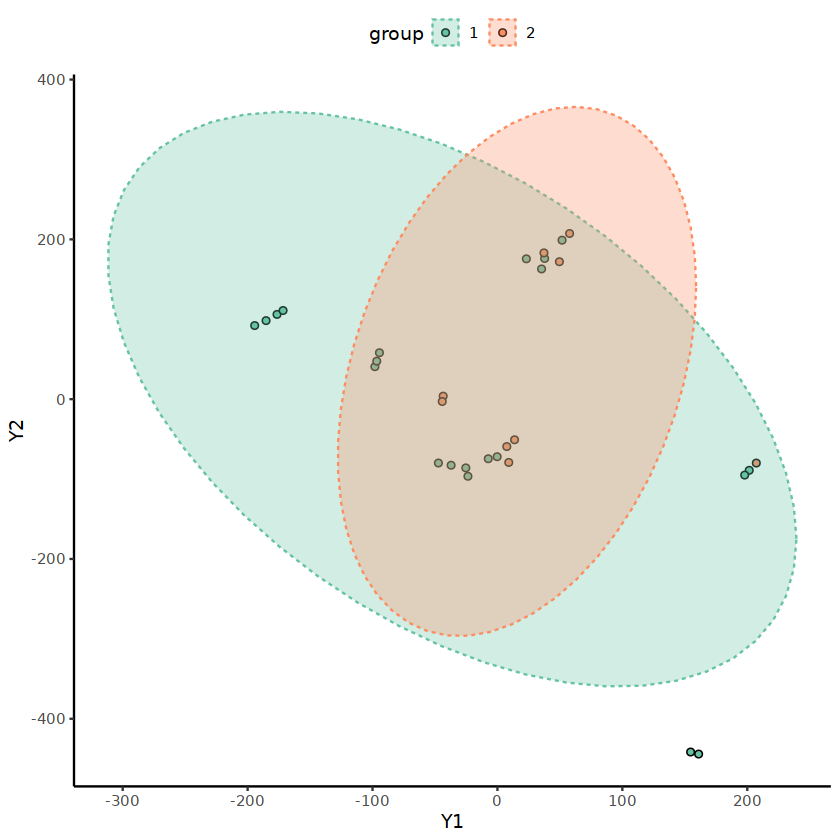

In [232]:
library(ggplot2)
library(paletteer)
ggplot(pdat,aes(Y1,Y2))+
  geom_point(aes(Y1,Y2,fill = group),shape = 21,color = "black")+
  stat_ellipse(aes(color = group,fill = group),
               geom = "polygon",
               alpha = 0.3,
               linetype = 2)+
  scale_color_paletteer_d("RColorBrewer::Set2")+
  scale_fill_paletteer_d("RColorBrewer::Set2")+
  theme_classic()+
  theme(legend.position = "top")